# import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [4]:
path = r'/Users/tayen/Documents/CF/Advanced Analytics Dashboard Design/02 Data/Processed Data'

In [9]:
purchase = pd.read_pickle(os.path.join(path,'purchase_ga_session.pickle'))

# data prep

In [10]:
purchase.head()

,visitID,date,visits,hits,pageviews,timeOnSite,transactions,totalTransactionRevenue,source,campaign,...,fullVisitorId,channelGrouping,socialEngagementType,productSKU_1,v2ProductName,v2ProductCategory,productVariant,productRevenue,productPrice,productQuantity
0,1470057237,20160801,1,32,24,None,1,170.40,(direct),(not set),...,3.213840e+18,Referral,Not Socially Engaged,GGOEGOAR021999,Color Changing Grip Pen,(not set),Single Option Only,24.75,1.20,20
1,1470057237,20160801,1,32,24,None,1,170.40,(direct),(not set),...,3.213840e+18,Referral,Not Socially Engaged,GGOEGFSR022099,Kick Ball,(not set),Single Option Only,32.55,1.59,20
2,1470057237,20160801,1,32,24,None,1,170.40,(direct),(not set),...,3.213840e+18,Referral,Not Socially Engaged,GGOEGBFC018799,Electronics Accessory Pouch,(not set),Single Option Only,80.55,3.99,20
3,1470057237,20160801,1,32,24,None,1,170.40,(direct),(not set),...,3.213840e+18,Referral,Not Socially Engaged,GGOEGOXQ016399,Badge Holder,(not set),Single Option Only,32.55,1.59,20
4,1470068872,20160801,1,35,26,None,1,19.93,google,(not set),...,2.976179e+18,Organic Search,Not Socially Engaged,GGOEGGOA017399,Maze Pen,(not set),Single Option Only,4.96,0.99,4


In [11]:
purchase.columns

Index(['visitID', 'date', 'visits', 'hits', 'pageviews', 'timeOnSite',
       'transactions', 'totalTransactionRevenue', 'source', 'campaign',
       'medium', 'keyword', 'adNetworkType', 'browser', 'operatingSystem',
       'isMobile', 'continent', 'subContinent', 'country', 'hitNumber',
       'isInteraction', 'time', 'hour', 'minute', 'pagePath', 'hostname',
       'pageTitle', 'transactionId', 'transactionRevenue', 'transactionTax',
       'transactionShipping', 'affiliation', 'currencyCode',
       'previousContentGroup1', 'previousContentGroup2',
       'previousContentGroup3', 'dataSource', 'fullVisitorId',
       'channelGrouping', 'socialEngagementType', 'productSKU_1',
       'v2ProductName', 'v2ProductCategory', 'productVariant',
       'productRevenue', 'productPrice', 'productQuantity'],
      dtype='object')

In [22]:
purchase_num = purchase.groupby('visitID')[['visits','hits','pageviews','transactions','totalTransactionRevenue']].max().copy()

In [23]:
purchase_num.head()

,visits,hits,pageviews,transactions,totalTransactionRevenue
visitID,,,,,
1470046365,1,54,39,1,1592.40
1470050783,1,38,31,1,12.99
1470052998,1,34,28,1,32.19
1470055898,1,18,14,1,72.70
1470057237,1,32,24,1,170.40


# elbow technique

In [25]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [28]:
score = [kmeans[i].fit(purchase_num).score(purchase_num) for i in range(len(kmeans))]
score

[-5991949673.940173,
 -2164034031.7375846,
 -1292139855.508805,
 -803086704.38213,
 -492900718.75717247,
 -340920641.7866912,
 -223211742.9400226,
 -157625580.62164772,
 -126048670.20671111]

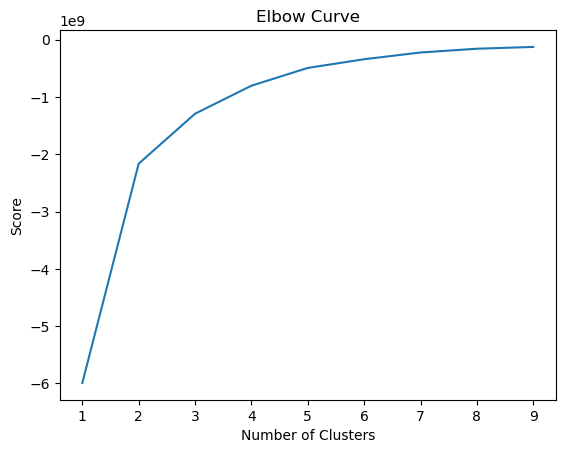

In [29]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# k-means clustering

In [53]:
kmeans = KMeans(n_clusters = 5) 

In [54]:
kmeans.fit(purchase_num)

KMeans(n_clusters=5)

# attach a new column with the resulting clusters

In [55]:
purchase_num['clusters'] = kmeans.fit_predict(purchase_num)

In [56]:
purchase_num.head()

,visits,hits,pageviews,transactions,totalTransactionRevenue,clusters
visitID,,,,,,
1470046365,1,54,39,1,1592.40,3
1470050783,1,38,31,1,12.99,0
1470052998,1,34,28,1,32.19,0
1470055898,1,18,14,1,72.70,0
1470057237,1,32,24,1,170.40,0


In [57]:
purchase_num['clusters'].value_counts()

0    10932
3      548
4       21
1        4
2        2
Name: clusters, dtype: int64

# visualizations

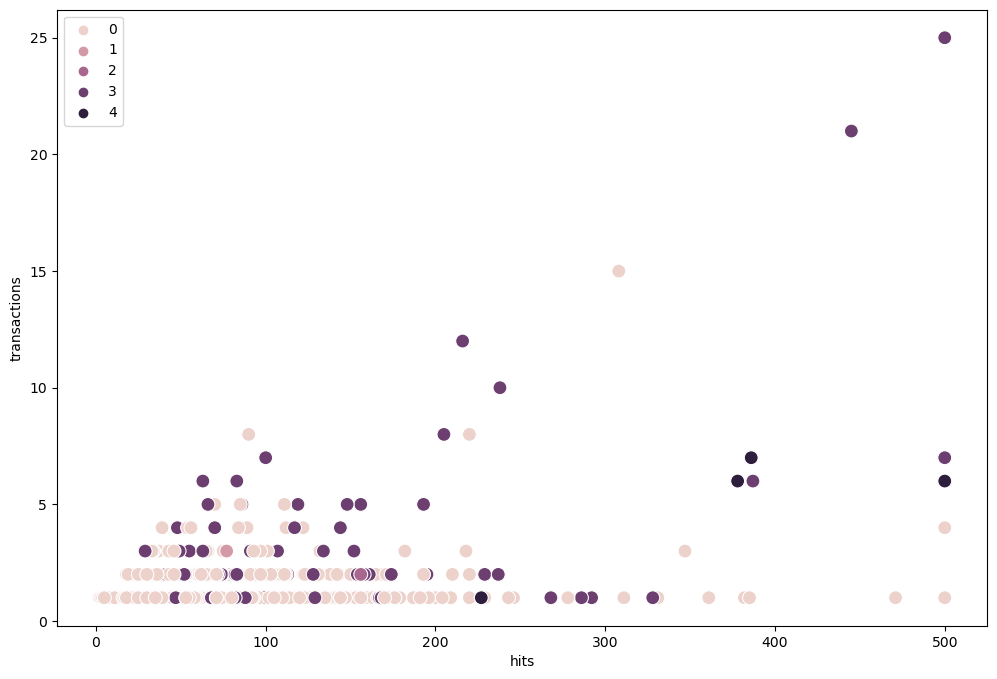

In [44]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=purchase_num['hits'], y=purchase_num['transactions'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('hits') # Label x-axis.
plt.ylabel('transactions') # Label y-axis.
plt.show()

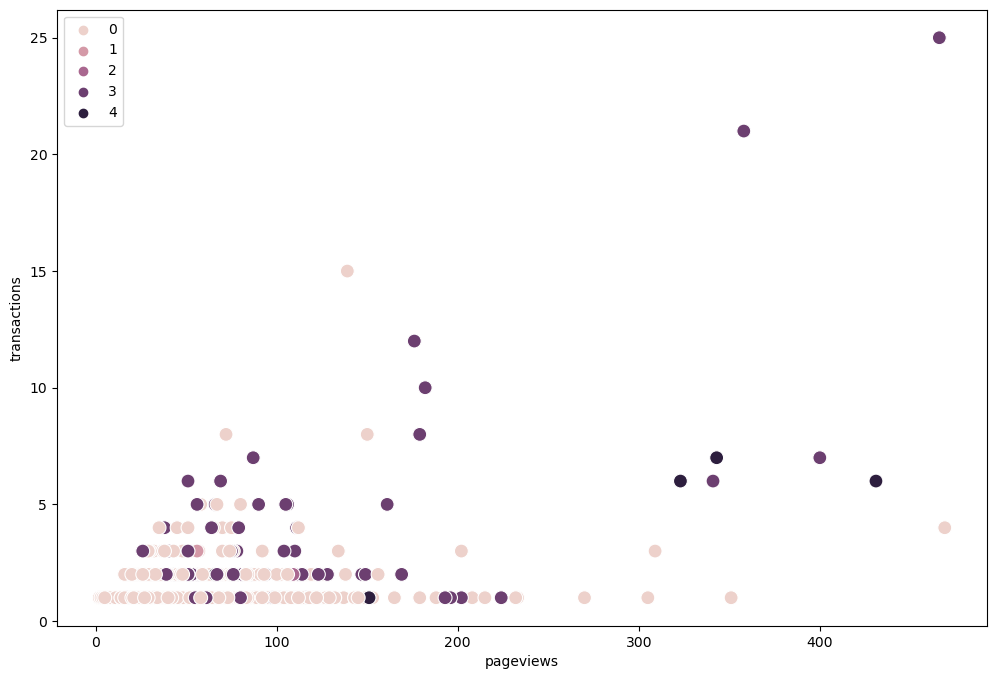

In [45]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=purchase_num['pageviews'], y=purchase_num['transactions'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('pageviews') # Label x-axis.
plt.ylabel('transactions') # Label y-axis.
plt.show()

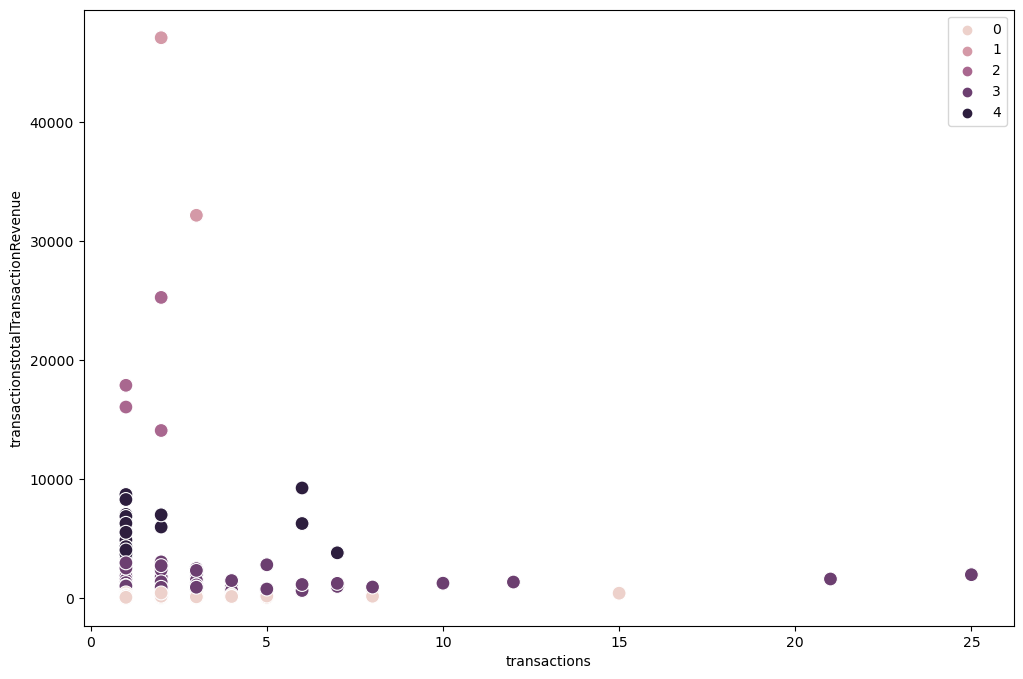

In [46]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=purchase_num['transactions'], y=purchase_num['totalTransactionRevenue'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('transactions') # Label x-axis.
plt.ylabel('transactionstotalTransactionRevenue') # Label y-axis.
plt.show()

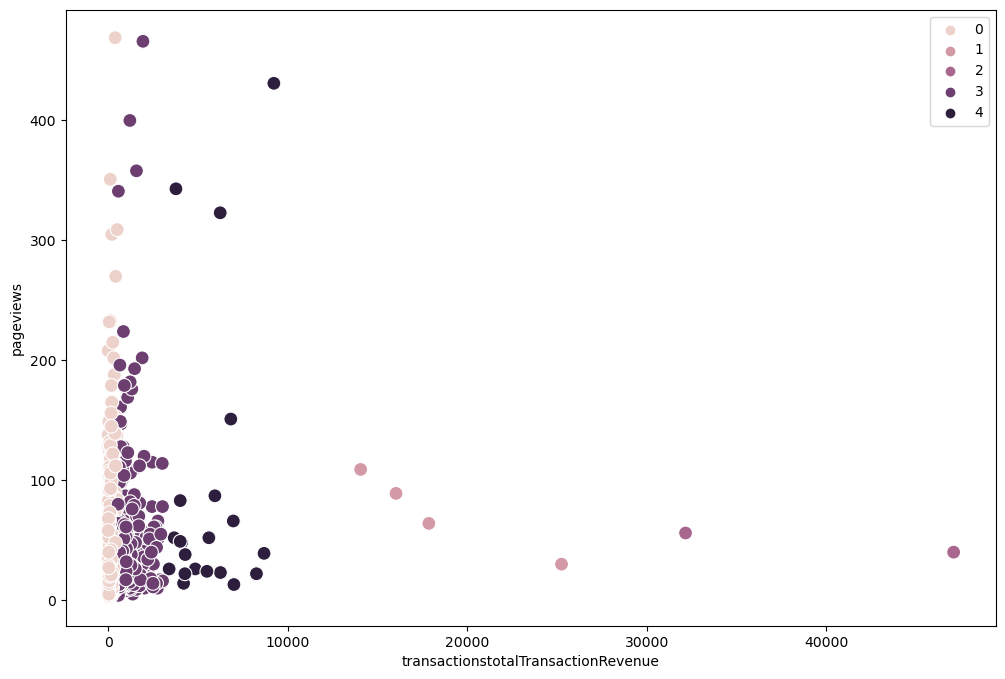

In [62]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=purchase_num['totalTransactionRevenue'], y=purchase_num['pageviews'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('transactionstotalTransactionRevenue') # Label x-axis.
plt.ylabel('pageviews') # Label y-axis.
plt.show()

# how and why the clusters make sense

In [ ]:
# The higher the price of a visitor's transaction, the more time the visitor spent on the site, it's defensible because people intend to investigate more infos when making an expensive purchase. 

# descriptive statistics

In [60]:
purchase_num.groupby('cluster').agg({'visits':['mean', 'median'], 
                                     'hits':['mean', 'median'], 
                                     'pageviews':['mean', 'median'],
                                     'transactions':['mean', 'median'],
                                     'totalTransactionRevenue':['mean', 'median']})

visits               hits         pageviews        transactions  \
              mean median        mean median       mean median         mean   
cluster                                                                       
dark purple    1.0    1.0  116.666667   64.0  92.000000   48.0     1.857143   
pink           1.0    1.0   34.818697   28.0  27.306531   23.0     1.030187   
purple         1.0    1.0   61.580292   48.0  45.925182   35.5     1.375912   

                   totalTransactionRevenue            
            median                    mean    median  
cluster                                               
dark purple    1.0             5575.966667  5501.000  
pink           1.0               87.475303    51.985  
purple         1.0             1008.929051   837.810

# an analytics pipeline	

In [63]:
# On which page did the visitor spend the most time?
# Is there any additional help available for those wishing to transact large sums?

Object `longer` not found.
